# Baseline: The Random Model
<hr style="clear:both">

This notebook presents our design of the baseline which is a random model.


*Authors:* Mahmoud Dokmak, Romain Corbel, Guilhem

<hr style="clear:both">

I. Import

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils.logistic_regression import *
from utils.helpers import *
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import f1_score


PATCH_SIZE = 16

II. Load the data

In [35]:
# Assume load_data() returns imgs and gt_imgs as lists of arrays
root_training_dir = "dataset/augmented_training/"
imgs, gt_imgs, n_train, files_train = load_data(root_training_dir, is_test=False)

# Convert ground truth masks to binary arrays
gt_imgs = [np.array(gt_img > 0.5).astype(int) for gt_img in gt_imgs]


# Ensure imgs and gt_imgs are the same length
assert len(imgs) == len(gt_imgs), "imgs and gt_imgs must have the same length"

# Generate indices for splitting
dataset_size = len(imgs)
indices = np.arange(dataset_size)  # Create an array of indices
np.random.seed(42)  # Set seed for reproducibility
np.random.shuffle(indices)  # Shuffle the indices

# Split indices into training and evaluation
split_ratio = 0.2  # Use 20% for evaluation
split_point = int(dataset_size * (1 - split_ratio))
train_indices = indices[:split_point]
eval_indices = indices[split_point:]

# Create training and evaluation splits
imgs_train = [imgs[i] for i in train_indices]
gt_imgs_train = [gt_imgs[i] for i in train_indices]
imgs_eval = [imgs[i] for i in eval_indices]
gt_imgs_eval = [gt_imgs[i] for i in eval_indices]

# Print the sizes to verify
print(f"Training set size: {len(imgs_train)}")
print(f"Evaluation set size: {len(imgs_eval)}")


Training set size: 160
Evaluation set size: 40


III. Distribution of 0 and 1 in the training set

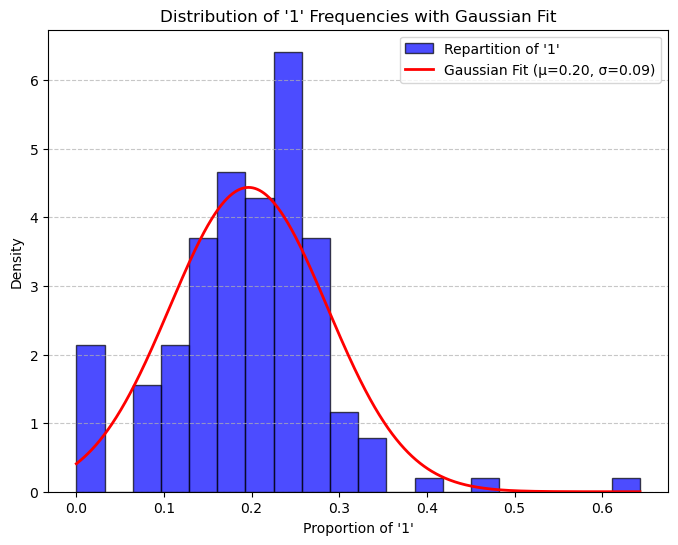

In [36]:
prop_road = []
for gt_img_train in gt_imgs_train:
    prop_road.append(np.mean(gt_img_train))

plt.figure(figsize=(8, 6))
count, bins, _ = plt.hist(prop_road, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black', label="Repartition of '1'")
mu, sigma = norm.fit(prop_road)
x = np.linspace(min(bins), max(bins), 1000)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'r-', lw=2, label=f"Gaussian Fit (μ={mu:.2f}, σ={sigma:.2f})")
plt.title("Distribution of '1' Frequencies with Gaussian Fit")
plt.xlabel("Proportion of '1'")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

IV. Sample proportions

Randomly draw proportions from the Gaussian distribution for the evaluation set.

In [37]:
num_values = len(imgs_eval)
np.random.seed(42)
sampled_proportions = np.random.normal(mu, sigma,num_values)
print("Sampled Proportions for Evaluation Set:\n", sampled_proportions)

def generate_random_mask(shape, proportion, random_seed=42):
    rng = np.random.default_rng(random_seed)
    size = np.prod(shape)
    num_ones = int(size * proportion)
    mask = np.zeros(size)
    mask[:num_ones] = 1
    rng.shuffle(mask)
    return mask.reshape(shape)

mask_shape_test = np.shape(gt_imgs_eval[0])
eval_masks = [generate_random_mask(mask_shape_test, proportion) for proportion in sampled_proportions]

Sampled Proportions for Evaluation Set:
 [0.24116225 0.18405643 0.2547399  0.3334624  0.17543279 0.17543426
 0.33851513 0.2655091  0.15426955 0.24528533 0.15481425 0.15460632
 0.21825153 0.02442305 0.04136314 0.14592254 0.10540358 0.22475237
 0.11482925 0.06947762 0.32830192 0.17618617 0.20256406 0.06835845
 0.14753278 0.20646667 0.09297815 0.23027885 0.14247348 0.17025798
 0.14237744 0.36307285 0.19527716 0.10136739 0.27046535 0.08669629
 0.21527485 0.02025105 0.07704262 0.21419543]


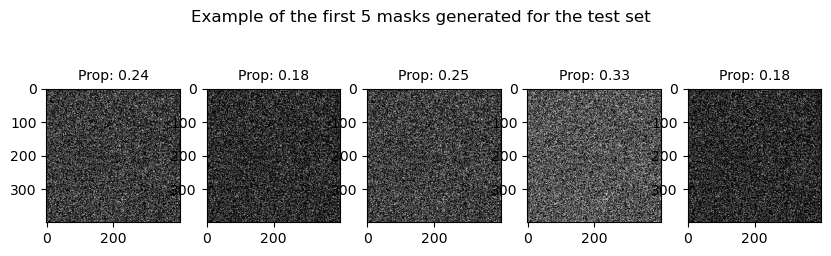

In [38]:
plt.figure(figsize=(10, 3))
plt.suptitle("Example of the first 5 masks generated for the test set")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(eval_masks[i], cmap='gray')
    plt.title(f"Prop: {sampled_proportions[i]:.2f}", fontsize=10)
plt.show()

V. Evaluation of the model

In [39]:
gt_imgs_eval_flattened = np.array(gt_imgs_eval).ravel()
eval_masks = np.array(eval_masks).ravel()
F1 = f1_score(gt_imgs_eval_flattened, eval_masks)
print(f"For this random model, we have a F1-score of: {F1:.4f}")

For this random model, we have a F1-score of: 0.1985
